In [1]:
#imporing essentials

import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from math import sqrt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# For downloading Updated Dataset

import yfinance as yf
from dateutil.relativedelta import relativedelta

#Libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
if os.path.exists("file.csv"):
    os.remove("file.csv")
    print("Removed file.csv")

currentTimeDate = dt.datetime.now() - relativedelta(years=5)
currentTime = currentTimeDate.strftime(format='%Y-%m-%d')
nct = str(currentTime)
db = yf.download("BTC-USD", start = nct , end = dt.datetime.now() )
db.to_csv("file.csv")

Removed file.csv
[*********************100%%**********************]  1 of 1 completed


In [3]:
maindf=pd.read_csv('file.csv')

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
X = maindf[numerical_cols].values

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA
pca = PCA()
pca.fit(X_scaled)

# get the principal components
components = pca.components_

# get the explained variance ratio
variance_ratio = pca.explained_variance_ratio_

# print the results
print('Principal components:')
print(components)
print('\nExplained variance ratio:')
print(variance_ratio)

Principal components:
[[ 4.36961523e-01  4.37566915e-01  4.36246633e-01  4.37054506e-01
   4.37054506e-01  2.12733203e-01]
 [-9.14587983e-02 -7.86461667e-02 -1.15475134e-01 -9.49966660e-02
  -9.49966660e-02  9.76763446e-01]
 [ 7.35401671e-01  1.77920787e-01  1.36057212e-02 -4.62232234e-01
  -4.62232234e-01 -5.11708215e-03]
 [-3.26326166e-02 -5.52081925e-01  8.15182200e-01 -1.20355131e-01
  -1.20355131e-01  2.54544072e-02]
 [-5.08742971e-01  6.82568470e-01  3.62832240e-01 -2.67983203e-01
  -2.67983203e-01 -1.90890342e-03]
 [-0.00000000e+00 -3.65057231e-15  5.42149078e-15 -7.07106781e-01
   7.07106781e-01  1.75811577e-16]]

Explained variance ratio:
[8.65656352e-01 1.33628883e-01 4.67276330e-04 2.02843222e-04
 4.46450237e-05 5.43036239e-35]


In [4]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])
print("\n-------------\n")

maindf.info()


Total number of days present in the dataset:  1827
Total number of fields present in the dataset:  7

-------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [5]:
print(maindf.describe())
print("\n-------------\n")

print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

               Open          High           Low         Close     Adj Close  \
count   1827.000000   1827.000000   1827.000000   1827.000000   1827.000000   
mean   23726.169115  24270.077128  23140.747898  23741.584551  23741.584551   
std    16153.877494  16566.497682  15674.271553  16146.591880  16146.591880   
min     3236.274658   3275.377930   3191.303467   3236.761719   3236.761719   
25%     9375.004883   9540.444336   9250.942383   9381.900879   9381.900879   
50%    20719.414062  21209.560547  20287.458984  20735.478516  20735.478516   
75%    34839.398438  35894.650391  33701.519531  34984.246094  34984.246094   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  1.827000e+03  
mean   2.864870e+10  
std    1.842682e+10  
min    3.551764e+09  
25%    1.657199e+10  
50%    2.553448e+10  
75%    3.616346e+10  
max    3.509679e+11  

-------------

Null Values: 0
NA values: False


In [6]:
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2018-11-20
Ending Date 2023-11-20


In [7]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

Exploratory Data Analysis (EDA)

In [8]:
import pandas as pd
import plotly.graph_objects as go

def plot_monthwise_comparison(df):
    # Extracting year from the 'Date' column
    df['Year'] = df['Date'].dt.year

    # Defining colors for each year
    year_colors = {
        2018: 'red',
        2019: 'blue',
        2020: 'green',
        2021: 'orange',
        2022: 'purple',
        2023: 'cyan'
    }

    # Creating an empty figure
    fig = go.Figure()

    # Iterating over each year
    for year in df['Year'].unique():
        year_df = df[df['Year'] == year]

        # Creating a month-wise summary
        monthwise = year_df.groupby(year_df['Date'].dt.strftime('%B'))[['Open', 'Close']].mean()
        new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                     'September', 'October', 'November', 'December']
        monthwise = monthwise.reindex(new_order, axis=0)

        # Adding traces for Open and Close prices with distinct shades
        fig.add_trace(go.Bar(
            x=monthwise.index,
            y=monthwise['Open'],
            name=f'crypto Open Price - {year}',
            marker_color=year_colors.get(year, 'grey')  # Using grey for unspecified years
        ))
        fig.add_trace(go.Bar(
            x=monthwise.index,
            y=monthwise['Close'],
            name=f'crypto Close Price - {year}',
            marker_color=year_colors.get(year, 'grey')  # Using grey for unspecified years
        ))

    # Updating the layout of the figure
    fig.update_layout({
        'plot_bgcolor': 'White',
        'paper_bgcolor': 'black'
    })
    fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                      title='Monthwise comparison between crypto open and close price',font_size=15, font_color='white')

    # Showing the plot
    fig.show()

# Example usage:
# Assuming maindf is your DataFrame containing crypto price data
plot_monthwise_comparison(maindf)


In [9]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)
print("\n-------------\n")

fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price for last 5 years', plot_bgcolor='white', 
                  font_size=15, font_color='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Shape of close dataframe: (1827, 2)

-------------



In [10]:
closedf = closedf[closedf['Date'] > '2018-01-09']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])
print("\n-------------\n")

fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Total data for prediction:  1827

-------------



Data Preprocessing

In [11]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)
print("\n-------------\n")

# we keep the training set as 80% and 20% testing set

training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

(1827, 1)

-------------

train_data:  (1461, 1)
test_data:  (366, 1)


In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1445, 15)
y_train:  (1445,)
X_test:  (350, 15)
y_test (350,)


In [13]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1445, 15, 1)
X_test:  (350, 15, 1)


In [14]:
def create_lstm_model(activation_function):
    model = Sequential()
    model.add(LSTM(50, input_shape=(None, 1), return_sequences=True, activation=activation_function))
    model.add(LSTM(50, activation=activation_function))
    model.add(Dense(1))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

def plot_performance_comparison(X_train, y_train, X_test, y_test):
    activation_functions = ["tanh", "relu", "selu", "gelu"]
    histories = []

    for activation_function in activation_functions:
        model = create_lstm_model(activation_function)
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
        histories.append(history)

    plt.figure(figsize=(12, 8))

    for i in range(len(activation_functions)):
        plt.subplot(2, 2, i + 1)
        plt.plot(histories[i].history['loss'], label='Training Loss')
        plt.plot(histories[i].history['val_loss'], label='Validation Loss')
        plt.title(f'Model with {activation_functions[i]} Activation')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

    plt.tight_layout()
    plt.show()


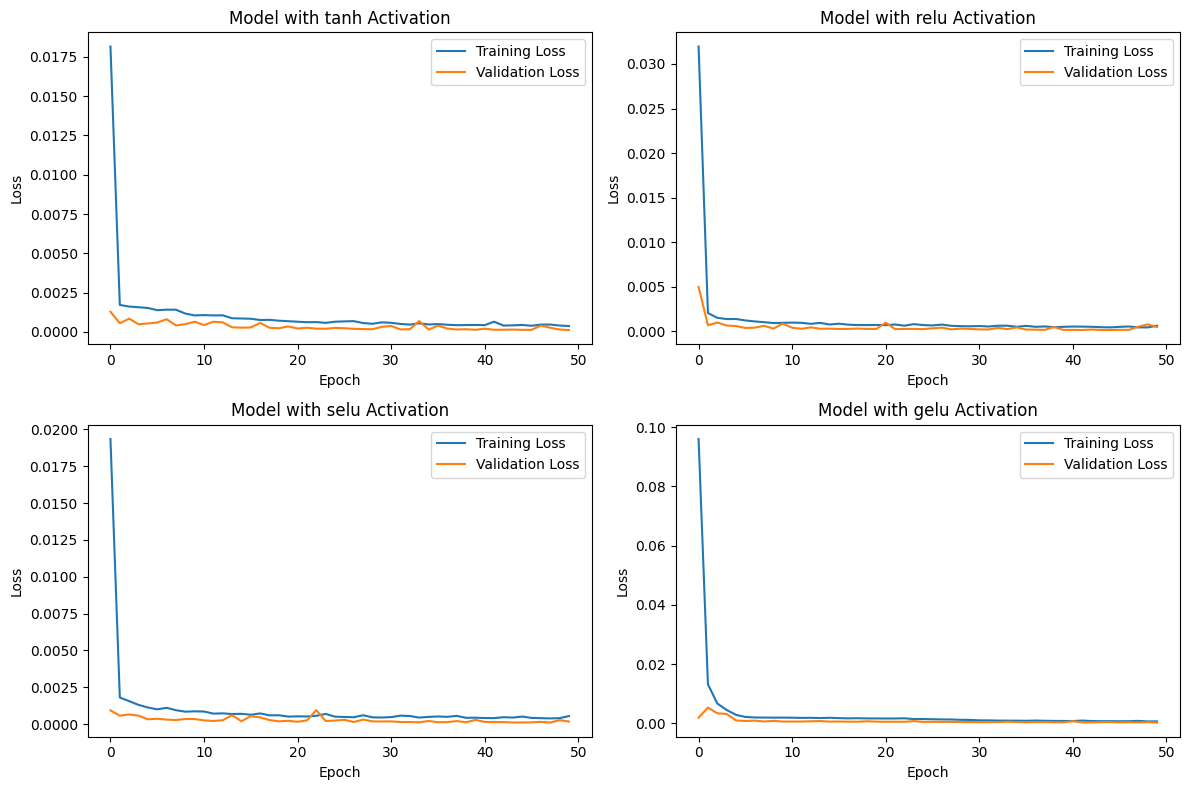

In [15]:
plot_performance_comparison(X_train, y_train, X_test, y_test)

In [16]:
def evaluate_models(X_train, y_train, X_test, y_test):
    activation_functions = ["tanh", "relu", "selu", "gelu"]
    metrics = {"RMSE": [], "MSE": [], "MAE": [], "Explained Variance": []}
    best_accuracy = 0
    best_activation = None

    # Set binary threshold based on your specific problem
    threshold_binary = 0.5  # Example threshold; adjust as needed

    for activation_function in activation_functions:
        model = create_lstm_model(activation_function)
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
        
        # Predictions
        y_pred = model.predict(X_test)

        # Evaluate binary classification subset
        y_test_binary = (y_test < threshold_binary).astype(int)
        y_pred_binary = (y_pred.flatten() < threshold_binary).astype(int)

        accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)

        # Evaluate regression subset
        rmse = sqrt(mean_squared_error(y_test, y_pred.flatten()))
        mse = mean_squared_error(y_test, y_pred.flatten())
        mae = mean_absolute_error(y_test, y_pred.flatten())
        ev = explained_variance_score(y_test, y_pred.flatten())

        # Print classification report
        report = classification_report(y_test_binary, y_pred_binary)
        print(f"\nModel with {activation_function} activation function:")
        print(f"Binary Classification Accuracy: {accuracy_binary}")
        print(f"Regression Mean Squared Error: {rmse}")
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}")
        print(f"Explained Variance Score : {ev}")
        print(f"Classification Report:\n{report}")

        # Update best model based on binary classification accuracy or regression MSE as needed
        if accuracy_binary > best_accuracy:
            best_accuracy = accuracy_binary
            best_activation = activation_function
        # Print the results

    print(f"\nBest activation function based on accuracy: {best_activation} with best accuracy: {best_accuracy}")
    return best_activation


In [17]:
best_activation = evaluate_models(X_train, y_train, X_test, y_test)

11/11 [==============================] - 1s 3ms/step

Model with tanh activation function:
Binary Classification Accuracy: 0.9685714285714285
Regression Mean Squared Error: 0.019922390040474997
Mean Squared Error: 0.00039690162492481737
Mean Absolute Error: 0.017901738311487985
Explained Variance Score : 0.9754288360730773
Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        14
           1       1.00      0.97      0.98       336

    accuracy                           0.97       350
   macro avg       0.78      0.98      0.85       350
weighted avg       0.98      0.97      0.97       350

11/11 [==============================] - 0s 4ms/step

Model with relu activation function:
Binary Classification Accuracy: 0.9942857142857143
Regression Mean Squared Error: 0.011691475603011824
Mean Squared Error: 0.00013669060177582068
Mean Absolute Error: 0.008151633844517165
Explained Variance Score : 0.9748249131212517


In [18]:
def Val_loss(X_train, y_train, X_test, y_test):
    activation_functions = ["tanh", "relu", "selu", "gelu"]
    
    for activation_function in activation_functions:
        model = create_lstm_model(activation_function)
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
        val_loss = history.history['val_loss'][-1]

        print(f"Model with {activation_function} activation function has validation loss: {val_loss}")

Val_loss(X_train, y_train, X_test, y_test)

Model with tanh activation function has validation loss: 0.0001605828438187018
Model with relu activation function has validation loss: 0.0004749120562337339
Model with selu activation function has validation loss: 0.00010595912317512557
Model with gelu activation function has validation loss: 0.0003811855858657509


In [19]:
# Create the best model using the determined activation function
best_model = create_lstm_model(best_activation)
best_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Generate predictions using the best model
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)


11/11 [==============================] - 0s 4ms/step


In [20]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 1
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = best_model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = best_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  1


In [21]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16]


In [22]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='white',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [23]:
import plotly.express as px
from itertools import cycle

# Assuming lstmdf is your DataFrame containing stock price data and lst_output is the predicted output

lstmdf = closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1, 1)).tolist())
lstmdf = scaler.inverse_transform(lstmdf).reshape(1, -1).tolist()[0]

# Assuming you have a timestamp associated with each data point, for example in a pandas DataFrame
# If you don't have a timestamp, you might need to create one based on your data

timestamps = pd.date_range(start='2023-11-18', periods=len(lstmdf), freq='H')

# Creating a DataFrame with timestamps and stock prices
df_plot = pd.DataFrame({'Timestamp': timestamps, 'Stock_price': lstmdf})

# Plotting the data using Plotly Express
names = cycle(['Close price'])

fig = px.line(df_plot, x='Timestamp', y='Stock_price', labels={'Stock_price': 'Stock Price', 'Timestamp': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='black', font_size=15, font_color='white', legend_title_text='Stock')
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})

fig.for_each_trace(lambda t: t.update(name=next(names)))
fig['layout']['yaxis'].update(autorange=True)
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()
